In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
dtype = {
    'ResponseID': 'category',
    'UserID': 'int8',
    'Intervention': 'int8',
    'PedPed': 'int8',
    'Barrier': 'int8',
    'CrossingSignal': 'int8',
    'AttributeLevel': 'category',
    'ScenarioTypeStrict': 'category',
    'NumberOfCharacters': 'int8',
    'DiffNumberOFCharacters': 'int8',
    'Saved': 'int8',
    'Man': 'int8',
    'Woman': 'int8',
    'Pregnant': 'int8',
    'Stroller': 'int8',
    'OldMan': 'int8',
    'OldWoman': 'int8',
    'Boy': 'int8',
    'Girl': 'int8',
    'Homeless': 'int8',
    'LargeWoman': 'int8',
    'LargeMan': 'int8',
    'Criminal': 'int8',
    'MaleExecutive': 'int8',
    'FemaleExecutive': 'int8',
    'FemaleAthlete': 'int8',
    'MaleAthlete': 'int8',
    'FemaleDoctor': 'int8',
    'MaleDoctor': 'int8',
    'Dog': 'int8',
    'Cat': 'int8'
}


In [3]:
# load data

df_total = pd.read_csv('total_dataset.csv', dtype=dtype)

In [4]:
df_total.shape

(5000000, 31)

In [5]:
df_total.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_01769128,0,1,1,0,0,Fit,Fitness,5,0,...,0,0,0,0,2,2,0,0,0,0
1,res_02590716,0,1,1,0,0,Fat,Fitness,4,0,...,1,0,0,0,0,0,0,0,0,0
2,res_02286140,0,0,0,0,1,Male,Gender,5,0,...,0,0,1,0,0,0,0,1,0,0
3,res_02017281,0,1,0,0,0,Fat,Fitness,5,0,...,0,0,0,0,0,0,0,0,0,0
4,res_00681249,0,0,1,0,0,Fat,Fitness,2,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_total['UserID'].value_counts()

UserID
0    4900000
1     100000
Name: count, dtype: int64

In [7]:
# checking how many different categories are in the categorical columns
print(len(df_total['AttributeLevel'].value_counts()))
print(len(df_total['ScenarioTypeStrict'].value_counts()))


12
6


In [94]:
# with one hot encoding, this means that there will be 17 (!) extra columns

In [21]:
# preprocessing

# one-hot encode the AttributeLevel and ScenarioTypeStrict
df_total_encoded = pd.get_dummies(df_total, columns=['AttributeLevel', 'ScenarioTypeStrict'])
print(df_total_encoded.columns)


Index(['ResponseID', 'UserID', 'Intervention', 'PedPed', 'Barrier',
       'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters',
       'Saved', 'Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman',
       'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal',
       'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete',
       'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat', 'AttributeLevel_Fat',
       'AttributeLevel_Female', 'AttributeLevel_Fit', 'AttributeLevel_High',
       'AttributeLevel_Hoomans', 'AttributeLevel_Less', 'AttributeLevel_Low',
       'AttributeLevel_Male', 'AttributeLevel_More', 'AttributeLevel_Old',
       'AttributeLevel_Pets', 'AttributeLevel_Young', 'ScenarioTypeStrict_Age',
       'ScenarioTypeStrict_Fitness', 'ScenarioTypeStrict_Gender',
       'ScenarioTypeStrict_Social Status', 'ScenarioTypeStrict_Species',
       'ScenarioTypeStrict_Utilitarian'],
      dtype='object')


In [22]:
df_total_encoded.dtypes

ResponseID                          category
UserID                                  int8
Intervention                            int8
PedPed                                  int8
Barrier                                 int8
CrossingSignal                          int8
NumberOfCharacters                      int8
DiffNumberOFCharacters                  int8
Saved                                   int8
Man                                     int8
Woman                                   int8
Pregnant                                int8
Stroller                                int8
OldMan                                  int8
OldWoman                                int8
Boy                                     int8
Girl                                    int8
Homeless                                int8
LargeWoman                              int8
LargeMan                                int8
Criminal                                int8
MaleExecutive                           int8
FemaleExec

In [23]:
df_total_encoded.head()

,ResponseID,UserID,Intervention,PedPed,Barrier,CrossingSignal,NumberOfCharacters,DiffNumberOFCharacters,Saved,Man,...,AttributeLevel_More,AttributeLevel_Old,AttributeLevel_Pets,AttributeLevel_Young,ScenarioTypeStrict_Age,ScenarioTypeStrict_Fitness,ScenarioTypeStrict_Gender,ScenarioTypeStrict_Social Status,ScenarioTypeStrict_Species,ScenarioTypeStrict_Utilitarian
0,res_01769128,0,1,1,0,0,5,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,res_02590716,0,1,1,0,0,4,0,0,0,...,False,False,False,False,False,True,False,False,False,False
2,res_02286140,0,0,0,0,1,5,0,0,1,...,False,False,False,False,False,False,True,False,False,False
3,res_02017281,0,1,0,0,0,5,0,0,1,...,False,False,False,False,False,True,False,False,False,False
4,res_00681249,0,0,1,0,0,2,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [12]:
"""
# Convert response_ID to a numeric sequential range
df_total_encoded['response_ID_mapped'] = df_total_encoded['ResponseID'].astype('category').cat.codes

# Optionally, drop the original response_ID column
df_total_encoded = df_total_encoded.drop('ResponseID', axis=1)
"""

# models weren't better with this, so I leave this out and drop ResponseID

"\n# Convert response_ID to a numeric sequential range\ndf_total_encoded['response_ID_mapped'] = df_total_encoded['ResponseID'].astype('category').cat.codes\n\n# Optionally, drop the original response_ID column\ndf_total_encoded = df_total_encoded.drop('ResponseID', axis=1)\n"

### Splitting

In [93]:
# Prepare features and target variable
X = df_total_encoded.drop(['UserID', 'ResponseID'], axis=1)   # Features
y = df_total_encoded['UserID']                # Target variable

In [94]:
X.shape

(5000000, 45)

In [95]:
# Split the data into train, validation and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.111111111111, random_state=42)

In [96]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4000000, 45)
(500000, 45)
(500000, 45)


### Logistic Regression with K-fold

In [97]:
lr_model = LogisticRegression()

# Set the number of folds
k = 5  # or any other value you want for k-fold cross-validation

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Perform cross-validation and calculate accuracy for each fold
accuracies = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='accuracy')

# Display accuracy for each fold and the mean accuracy
print("Accuracies for each fold:", accuracies)
print("Mean accuracy:", np.mean(accuracies))

Accuracies for each fold: [0.98011    0.98010125 0.9798625  0.9800275  0.97987875]
Mean accuracy: 0.9799960000000001


In [60]:
# Define the model
model = LogisticRegression()

In [99]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4000000, 45)
(500000, 45)
(500000, 45)


In [65]:
# Define the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1]}

# Create the GridSearchCV object
cv_object = RandomizedSearchCV(estimator=model, 
                          param_distributions=param_grid, 
                          scoring='accuracy', 
                          cv=3,  # 3-fold cross-validation
                          verbose=1,
                          return_train_score=True)

# Fit the model using GridSearchCV
cv_object.fit(X_train, y_train)

# Now you have a cv_object that contains all necessary information
print("Best Parameters:", cv_object.best_params_)
print("Best Cross-Validation Score:", cv_object.best_score_)

c:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 0.1}
Best Cross-Validation Score: 0.9799964999986225


In [68]:
best_model = cv_object.best_estimator_
y_pred = best_model.predict(X)

# Print accuracy on the whole dataset
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the training set: {accuracy:}")

# Display accuracies per fold
cv_results = cv_object.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

Accuracy on the training set: 0.980026


In [69]:
results_df = pd.DataFrame({
    'Parameters': params,
    'Mean Accuracy': mean_test_scores,
    'Standard Deviation': std_test_scores
})

# Display the results DataFrame
print("\nCross-Validation Results:")
print(results_df)


Cross-Validation Results:
    Parameters  Mean Accuracy  Standard Deviation
0  {'C': 0.01}       0.979992            0.000007
1   {'C': 0.1}       0.979996            0.000008
2     {'C': 1}       0.979996            0.000008


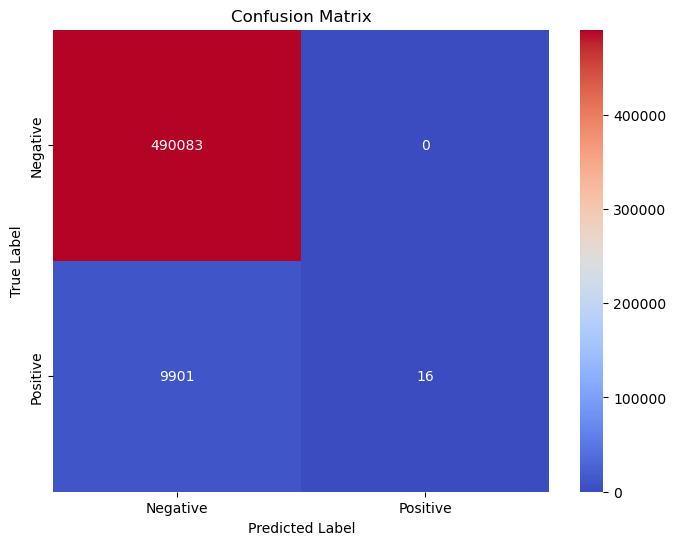

In [66]:
# Make predictions with the best estimator
y_pred = cv_object.best_estimator_.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm',
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)


In [28]:
# Evaluate the model - without k-fold
# print('Accuracy:', accuracy_score(y_val, y_pred_lr))

Accuracy: 0.980092


In [29]:
# cm = confusion_matrix(y_val, y_pred_lr)
# print('Confusion Matrix:')
# print(cm)

# print('Classification Report:')
# print(classification_report(y_val, y_pred_lr))

Confusion Matrix:
[[490036      0]
 [  9954     10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    490036
           1       1.00      0.00      0.00      9964

    accuracy                           0.98    500000
   macro avg       0.99      0.50      0.50    500000
weighted avg       0.98      0.98      0.97    500000



In [20]:
# zonder responseID doet ie het beter dan zonder
# met 97999 dus slechter dan alleen 0 gokken
# zonder 98296, wat wat beter is dan alleen 0 gokken

# beide op de validation set!

# op test set deed ie het nog wat beter vm

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store true labels and predictions
y_true = []
y_pred = []
fold_accuracies = []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred_fold = model.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy_fold = accuracy_score(y_test, y_pred_fold)
    fold_accuracies.append(accuracy_fold)
    
    # Append the results
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)
    
    print(f'Fold {fold + 1} Accuracy: {accuracy_fold:.4f}')

# Convert lists to numpy arrays for easier manipulation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

Fold 1 Accuracy: 0.9800
Fold 2 Accuracy: 0.9802
Fold 3 Accuracy: 0.9799
Fold 4 Accuracy: 0.9801
Fold 5 Accuracy: 0.9800


In [85]:
# Print the overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall Accuracy: {accuracy:}')

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

Overall Accuracy: 0.980029
Confusion Matrix:
[[4900000       0]
 [  99855     145]]


In [87]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99   4900000
           1       1.00      0.00      0.00    100000

    accuracy                           0.98   5000000
   macro avg       0.99      0.50      0.50   5000000
weighted avg       0.98      0.98      0.97   5000000



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_val)

In [32]:
# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {accuracy_rf:}')

Accuracy: 0.983858


In [33]:
# Confusion matrix
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_val, y_pred_rf)
print("Classification Report:\n", class_report_rf)

Confusion Matrix:
 [[489704    332]
 [  7739   2225]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    490036
           1       0.87      0.22      0.36      9964

    accuracy                           0.98    500000
   macro avg       0.93      0.61      0.67    500000
weighted avg       0.98      0.98      0.98    500000



### SVM on a subset

In [241]:
sub_10000_encoded['UserID'].value_counts()

UserID
0    9800
1     200
Name: count, dtype: int64

In [242]:
# Prepare features and target variable
X_10000 = sub_10000_encoded.drop(['UserID', 'ResponseID'], axis=1)    # Features
y_10000 = sub_10000_encoded['UserID']                                 # Target variable
# Split the data into train, validation and test sets
X_trainval_10000, X_test_10000, y_trainval_10000, y_test_10000 = train_test_split(X_10000, y_10000, test_size=0.1, random_state=42)
X_train_10000, X_val_10000, y_train_10000, y_val_10000 = train_test_split(X_trainval_10000, y_trainval_10000, test_size=0.111111111111, random_state=42)

In [243]:
from sklearn.svm import SVC

# Define custom class weights
class_weights = {0: 1, 1: 15}  # Give higher weight to class 1 (minority class)

# Initialize SVC with custom class weights
svc = SVC(kernel='rbf', class_weight=class_weights, random_state=45)

# choosing rbf cause not linearly separable            
# Train the model
svc.fit(X_train_10000, y_train_10000)
# Make predictions on the test data
y_pred_svm = svc.predict(X_test_10000)
# Evaluate the model
accuracy_svm = accuracy_score(y_test_10000, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')
# Confusion matrix
conf_matrix = confusion_matrix(y_test_10000, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test_10000, y_pred_svm)
print("Classification Report:\n", class_report)


Accuracy: 0.96
Confusion Matrix:
 [[959  17]
 [ 23   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       976
           1       0.06      0.04      0.05        24

    accuracy                           0.96      1000
   macro avg       0.52      0.51      0.51      1000
weighted avg       0.95      0.96      0.96      1000



### MLP met 10.000

In [203]:
""" F1


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers


# Custom F1 Score Metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
    true_positives = tf.reduce_sum(y_true * y_pred)
    false_positives = tf.reduce_sum((1 - y_true) * y_pred)
    false_negatives = tf.reduce_sum(y_true * (1 - y_pred))

    precision = true_positives / (true_positives + false_positives + tf.keras.backend.epsilon())
    recall = true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())
    
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1"""


In [38]:
from tensorflow.keras import layers, optimizers
from keras import models

learning_rate = 5e-4

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [255]:
X_10000 = np.array(X_10000, dtype=np.float32)  # Convert features to float32
y_10000 = np.array(y_10000, dtype=np.float32)
X_val_10000 = np.array(X_val_10000, dtype=np.float32)
y_val_10000 = np.array(y_val_10000, dtype=np.float32)

In [258]:
model = build_model()
history = model.fit(X_10000, y_10000, epochs=20, batch_size=32, validation_data=(X_val_10000, y_val_10000), verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7025 - loss: 0.5996 - val_accuracy: 0.9760 - val_loss: 0.2509
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.9793 - loss: 0.1635 - val_accuracy: 0.9770 - val_loss: 0.1051
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9803 - loss: 0.0904 - val_accuracy: 0.9770 - val_loss: 0.0918
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.9813 - loss: 0.0751 - val_accuracy: 0.9780 - val_loss: 0.0859
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9821 - loss: 0.0668 - val_accuracy: 0.9780 - val_loss: 0.0819
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9825 - loss: 0.0607 - val_accuracy: 0.9780 - val_loss: 0.0798
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.9828 - loss: 0.0555 - val_accuracy: 0.9800 - val_loss: 0.0770
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.9849 - loss: 0.0505 - va

In [259]:
# evaluate the model

val_loss, val_accuracy = model.evaluate(X_val_10000, y_val_10000)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0485 


In [260]:
# confusion matrix

y_pred_mlp = model.predict(X_val_10000)
y_pred_mlp = (y_pred_mlp > 0.5)
np.concatenate((y_pred_mlp.reshape(len(y_pred_mlp),1), y_val_10000.reshape(len(y_val_10000),1)),1)

cm = confusion_matrix(y_val_10000, y_pred_mlp)
print(cm)

# classification report

print(classification_report(y_val_10000, y_pred_mlp))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[976   0]
 [ 18   6]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       976
         1.0       1.00      0.25      0.40        24

    accuracy                           0.98      1000
   macro avg       0.99      0.62      0.70      1000
weighted avg       0.98      0.98      0.98      1000



### LR with 10.000

In [121]:
# Create and train the logistic regression model on 10.000
model_10 = LogisticRegression()
model_10.fit(X_train_10000, y_train_10000)

LogisticRegression()

In [122]:
# Make predictions
y_pred = model_10.predict(X_val_10000)

In [123]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_val_10000, y_pred))

Accuracy: 0.976


In [124]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_10000, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test_10000, y_pred_svm)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[976   0]
 [ 24   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.00      0.00      0.00        24

    accuracy                           0.98      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.98      0.96      1000



c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Isolation forest

In [137]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest model to detect anomalies (positive class treated as anomaly)
model_isolation = IsolationForest(contamination=0.1)
model_isolation.fit(X_train)

# Predict on test set (-1 is anomaly, 1 is normal)
y_pred_isolation = model_isolation.predict(X_test)

# Map predictions (-1 = positive class, 1 = negative class)
y_pred_isolation = [0 if x == 1 else 1 for x in y_pred_isolation]

# Confusion matrix to evaluate True Negatives
cm = confusion_matrix(y_test, y_pred_isolation)
print(cm)

[[441108  48975]
 [  9018    899]]


In [139]:
print('Accuracy:', accuracy_score(y_val, y_pred_isolation))

# Classification report
class_report = classification_report(y_test, y_pred_isolation)
print("Classification Report:\n", class_report)

Accuracy: 0.884476
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94    490083
           1       0.02      0.09      0.03      9917

    accuracy                           0.88    500000
   macro avg       0.50      0.50      0.48    500000
weighted avg       0.96      0.88      0.92    500000



### MLP met 5.000.000

In [34]:
X_mlp = np.array(X, dtype=np.float32)  # Convert features to float32
y_mlp = np.array(y, dtype=np.float32)
X_val_mlp = np.array(X_val, dtype=np.float32)
y_val_mlp = np.array(y_val, dtype=np.float32)

In [39]:
model_mlp5 = build_model()
history_mlp5 = model_mlp5.fit(X_mlp, y_mlp, epochs=10, batch_size=64, validation_data=(X_val_mlp, y_val_mlp), verbose=1)

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 69s 861us/step - accuracy: 0.9791 - loss: 0.0944 - val_accuracy: 0.9840 - val_loss: 0.0787
Epoch 2/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 69s 883us/step - accuracy: 0.9839 - loss: 0.0794 - val_accuracy: 0.9840 - val_loss: 0.0780
Epoch 3/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 75s 954us/step - accuracy: 0.9839 - loss: 0.0785 - val_accuracy: 0.9840 - val_loss: 0.0776
Epoch 4/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 75s 956us/step - accuracy: 0.9839 - loss: 0.0783 - val_accuracy: 0.9840 - val_loss: 0.0773
Epoch 5/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 70s 895us/step - accuracy: 0.9839 - loss: 0.0783 - val_accuracy: 0.9840 - val_loss: 0.0773
Epoch 6/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 68s 873us/step - accuracy: 0.9840 - loss: 0.0779 - val_accuracy: 0.9840 - val_loss: 0.0773
Epoch 7/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 73s 935us/step - accuracy: 0.9839 - loss: 0.0782 - val_accuracy: 0.9840 - val_loss: 0.0774
Epoch 8/10
78125/78125 ━━━━━━━━━━━━━━━━━━━━ 71s 909us/s

In [40]:
# evaluate the model

val_loss, val_accuracy = model_mlp5.evaluate(X_val_mlp, y_val_mlp)

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 513us/step - accuracy: 0.9839 - loss: 0.0776


In [41]:
# confusion matrix

y_pred_mlp = model_mlp5.predict(X_val_mlp)
y_pred_mlp = (y_pred_mlp > 0.5)
np.concatenate((y_pred_mlp.reshape(len(y_pred_mlp),1), y_val_mlp.reshape(len(y_val_mlp),1)),1)

cm_mlp = confusion_matrix(y_val_mlp, y_pred_mlp)
print(cm_mlp)

# classification report

print(classification_report(y_val_mlp, y_pred_mlp))

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 520us/step
[[490027      9]
 [  7977   1987]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    490036
         1.0       1.00      0.20      0.33      9964

    accuracy                           0.98    500000
   macro avg       0.99      0.60      0.66    500000
weighted avg       0.98      0.98      0.98    500000



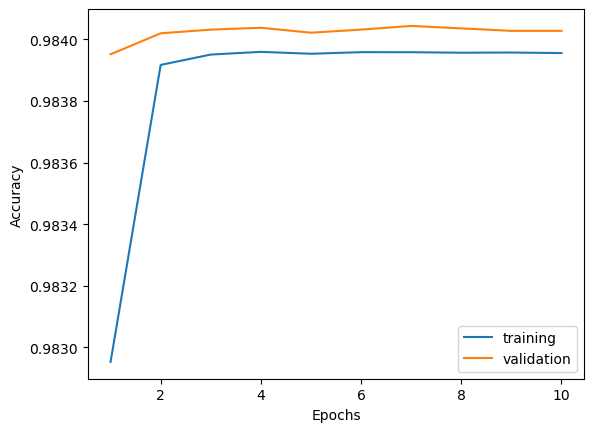

In [42]:
# plot to visualize training and validation accuracy


acc_history = history_mlp5.history['accuracy']
val_acc_history = history_mlp5.history['val_accuracy']

plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
# Eigenlijk leert hij dus vanaf de 3e epoch niks meer